# 훈련 완료된 모델을 이용하여, 결과를 추론

In [18]:
import os, torch, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# 체크포인트 경로 및 체크포인트 파일 확인
chk_dir = '/content/drive/MyDrive/CV_Projects/pytorch_steelDefect/checkpoint'
chk_file = os.path.join(chk_dir, 'model_epoch.pth')

In [4]:
print(os.path.exists(chk_dir))
print(chk_dir)
print(chk_file)

True
/content/drive/MyDrive/CV_Projects/pytorch_steelDefect/checkpoint
/content/drive/MyDrive/CV_Projects/pytorch_steelDefect/checkpoint/model_epoch.pth


## Create Dataset and Dataloader for TestModel.

## Create Test Model(with checkpoint file)

In [ ]:
# https://pypi.org/project/segmentation-models-pytorch/
!pip install segmentation-models-pytorch
!pip install albumentations

In [42]:
import segmentation_models_pytorch as smp
from albumentations import Compose, Normalize
from albumentations.pytorch import ToTensorV2

In [ ]:
# define model and load pre-trained model.
model = smp.Unet(encoder_name="resnet18", encoder_weights=None, classes=4, activation=None)
dict_model = torch.load(f=chk_file, map_location=torch.device(device))  # keys for dict : 'net', 'optim'

model.load_state_dict(dict_model['net'])
model.eval()

데이터 셋을 만들기 전에 이미지 한 개로 모델 테스트를 해보자.

In [14]:
data_dir = '/content/drive/MyDrive/CV_Projects/pytorch_steelDefect/datasets'
data_test = os.path.join(data_dir, 'test_images')
fnames = os.listdir(data_test)

In [16]:
len(fnames)

5506

In [56]:
input = cv2.imread(os.path.join(data_test, fnames[100]))

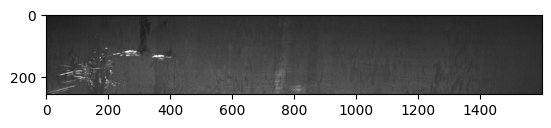

In [57]:
plt.imshow(input)

In [83]:
mean = (0.485, 0.456, 0.406)
std =  (0.229, 0.224, 0.225)
# transform function and apply it.
list_transforms = [Normalize(mean=mean, std=std, p=1), ToTensorV2()]
transforms = Compose(list_transforms)

In [84]:
input_t = transforms(image=input)
input_t = input_t['image']

if input_t.ndim == 3:
  input_t = input_t.unsqueeze(dim=0)
  print(input_t.shape)  # (batch_size, channel, width, height)

torch.Size([1, 3, 256, 1600])


In [85]:
output_t = model(input_t)

In [88]:
output_t.mean()

tensor(-6.0870, grad_fn=<MeanBackward0>)